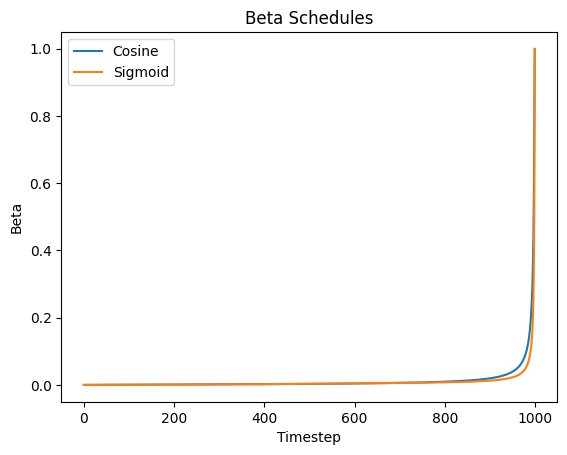

In [3]:
import matplotlib.pyplot as plt
import math
timesteps = 1000
cosine_betas = cosine_beta_schedule(timesteps)
sigmoid_betas = sigmoid_beta_schedule(timesteps)

plt.plot(cosine_betas, label="Cosine")
plt.plot(sigmoid_betas, label="Sigmoid")
plt.xlabel("Timestep")
plt.ylabel("Beta")
plt.legend()
plt.title("Beta Schedules")
plt.show()

In [1]:
import torch
def cosine_beta_schedule(timesteps, s=0.008):
        """Cosine schedule as proposed in https://arxiv.org/abs/2102.09672"""
        steps = timesteps + 1
        x = torch.linspace(0, timesteps, steps)
        alphas_cumprod = torch.cos(((x / timesteps) + s) / (1 + s) * math.pi * 0.5) ** 2
        alphas_cumprod = alphas_cumprod / alphas_cumprod[0]
        betas = 1 - (alphas_cumprod[1:] / alphas_cumprod[:-1])
        return torch.clamp(betas, min=0, max=0.999)
    
def sigmoid_beta_schedule( timesteps, start=-3, end=3, tau=1, clamp_min=1e-5):
    """Sigmoid schedule"""
    steps = timesteps + 1
    t = torch.linspace(0, timesteps, steps) / timesteps
    v_start = torch.sigmoid(torch.tensor(start / tau))
    v_end = torch.sigmoid(torch.tensor(end / tau))
    alphas_cumprod = torch.sigmoid((t * (end - start) + start) / tau)
    alphas_cumprod = (v_end - alphas_cumprod) / (v_end - v_start)
    betas = 1 - (alphas_cumprod[1:] / alphas_cumprod[:-1])
    return torch.clip(betas, clamp_min, 0.999)